<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva.

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов.

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

<ipython-input-2-db0e3586f8da>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [3]:
df_kiva_loans = pd.read_csv("/content/drive/MyDrive/SkillBox/Kiva/kiva_loans.csv")
df_mpi = pd.read_csv("/content/drive/MyDrive/SkillBox/Kiva/kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [6]:
df_kiva_loans.head(3)
# df_mpi.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски.
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



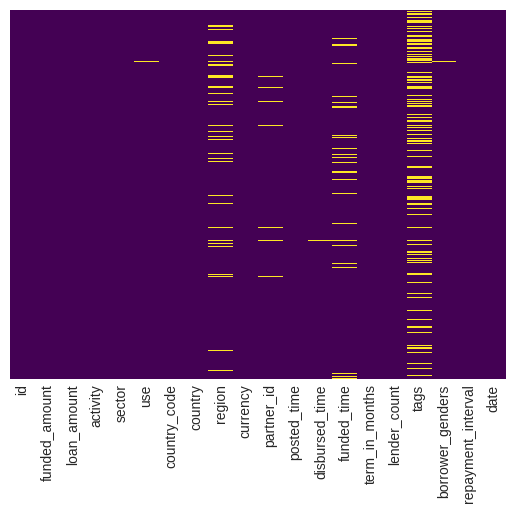

In [7]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

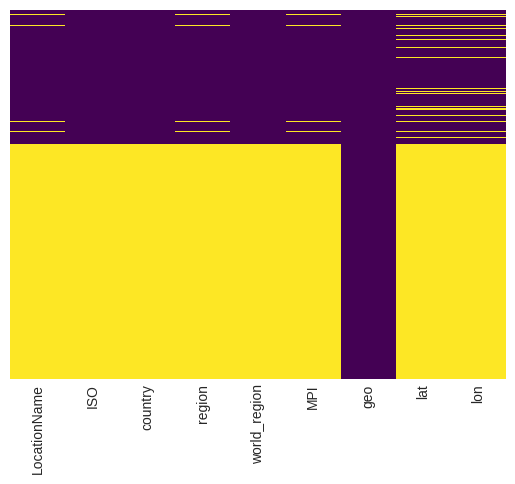

In [8]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

**Что мы видим?**

В некоторых колонках присутствуют пропуски.

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```.

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [10]:
df_mpi.info()

# тут достаточно много пропусков...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [11]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [13]:
df_kiva_loans.dropna(inplace=True)
df_mpi.dropna(inplace=True)

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [14]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

In [15]:
df_mpi.info() # супер мало осталось, это точно норм??

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  892 non-null    object 
 1   ISO           892 non-null    object 
 2   country       892 non-null    object 
 3   region        892 non-null    object 
 4   world_region  892 non-null    object 
 5   MPI           892 non-null    float64
 6   geo           892 non-null    object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.7+ KB


_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных?

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




<Axes: >

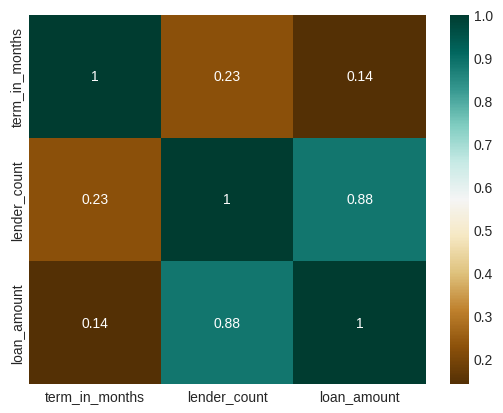

In [17]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]

df_corr = df_temp.corr()

sns.heatmap(data=df_corr, cmap='BrBG', annot=True)

# правильно я понимаю, что чем ближе значение к единице, тем больше кореллируют признаки?
# например, между lender_count и loan_amount можно найти взаимосвязь
# (что, в принципе, вполне логично: больше сумма - больше людей внесли вклад)
# а вот срок кредита не сильно связан с количество кредиторов и суммой

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

<Axes: xlabel='funded_amount', ylabel='Count'>

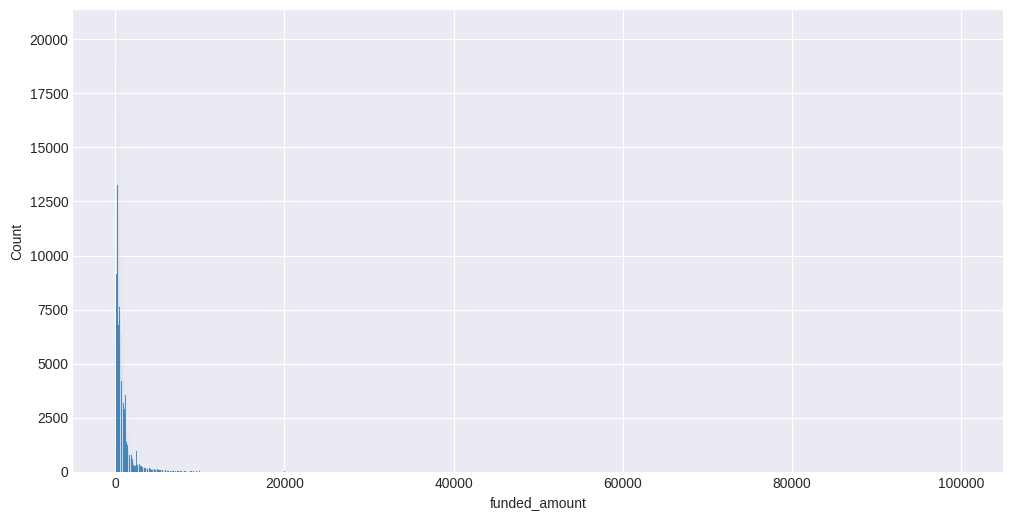

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(df_kiva_loans['funded_amount'], ax=ax)

# а почему такой уродливый график? как исправить? слишком много значений попадает?

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены?

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [33]:
df_kiva_loans[df_kiva_loans.loan_amount > 20000].groupby('country')['loan_amount'].count().sort_values(ascending=False)
# больше всего в Кении их оформляют

country
Kenya                               13
Peru                                 7
Mexico                               7
Rwanda                               6
Haiti                                5
Uganda                               5
Tanzania                             5
Ghana                                5
Indonesia                            3
Lao People's Democratic Republic     2
Guatemala                            2
Colombia                             2
Panama                               1
Sierra Leone                         1
South Sudan                          1
Philippines                          1
Zambia                               1
Albania                              1
Madagascar                           1
Nigeria                              1
Mozambique                           1
Mali                                 1
Benin                                1
Ecuador                              1
Cote D'Ivoire                        1
Chile            

In [34]:
df_kiva_loans[df_kiva_loans.loan_amount > 20000].groupby('sector')['loan_amount'].count().sort_values(ascending=False)
# много заявок на агрокультуру и ретейл

sector
Agriculture       30
Retail            21
Services           5
Education          4
Arts               3
Health             3
Transportation     3
Wholesale          3
Construction       2
Food               2
Manufacturing      2
Clothing           1
Name: loan_amount, dtype: int64

____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [39]:
df_mpi.groupby('region')['MPI'].mean().sort_values(ascending = False).head(5)

region
Lac          0.744
Wadi Fira    0.709
Sila         0.697
Kanem        0.696
Sahel        0.690
Name: MPI, dtype: float64

### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

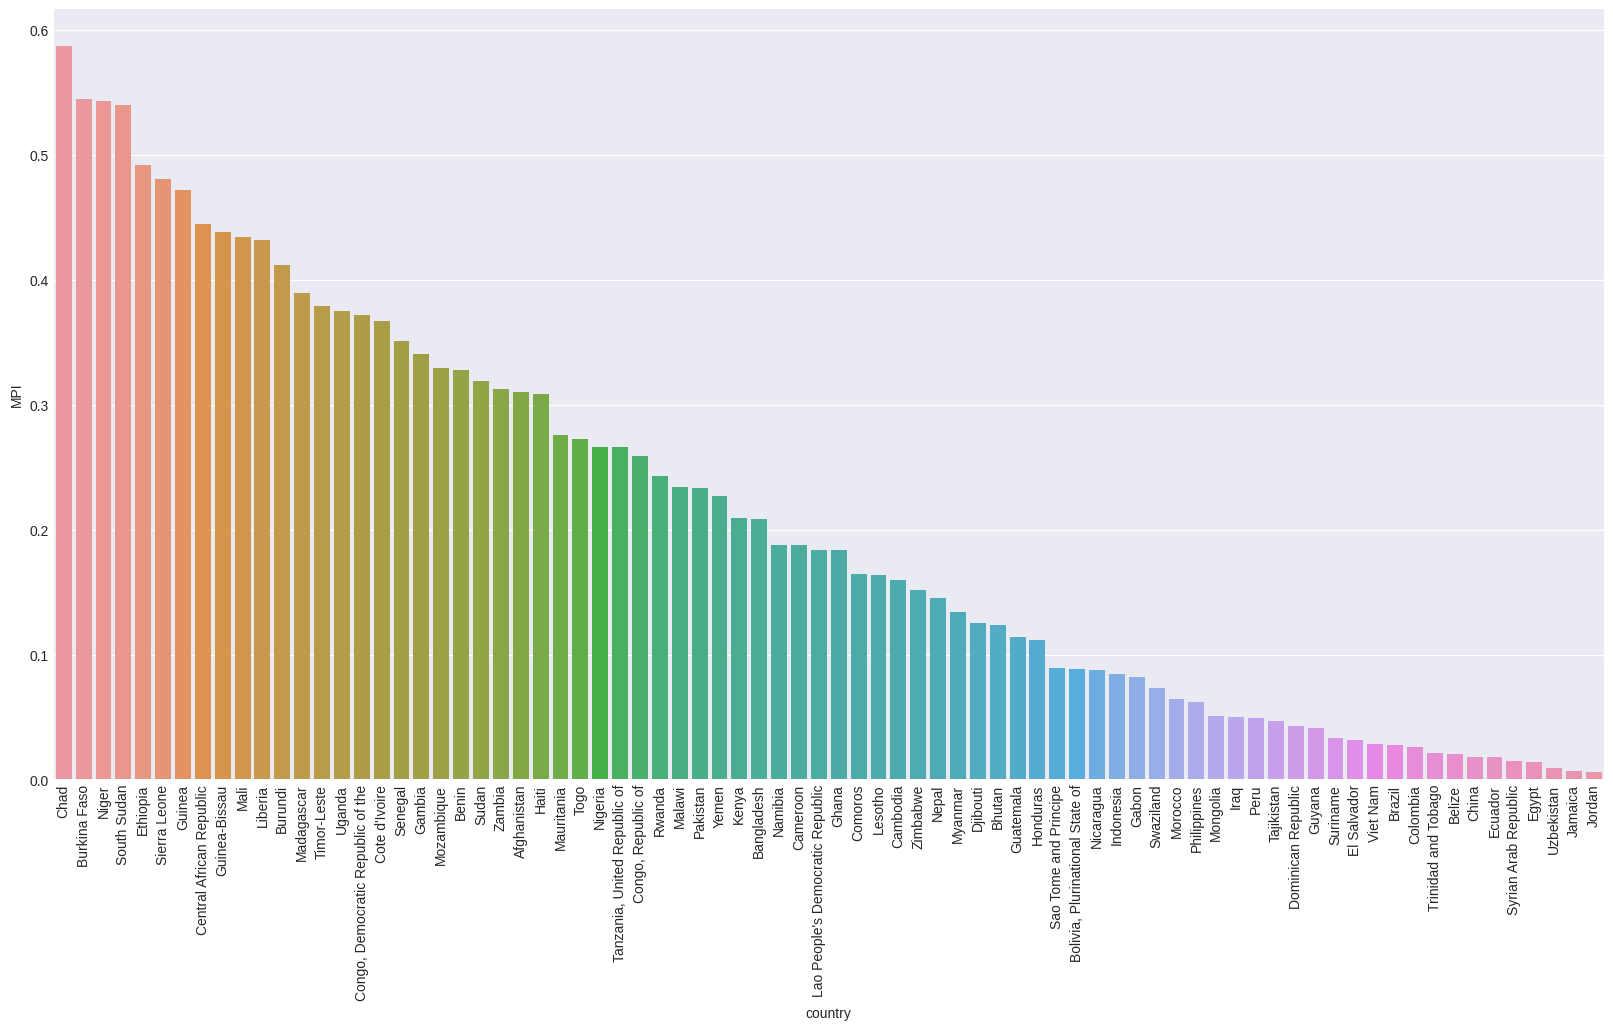

In [53]:
df_temp = df_mpi.groupby('country')['MPI'].mean().sort_values(ascending=False).reset_index() # мне брать среднее значение для разных регионов страны?

fig, ax = plt.subplots(figsize=(20, 10))
bpl = sns.barplot(data=df_temp, x='country', y='MPI', ax=ax)
bpl.set_xticklabels(bpl.get_xticklabels(),
                          rotation=90)

plt.show()